In [1]:
# import required modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# load dataset
col_names = ['pregnant', 'glucose', 'bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv("./diabetes.csv",header=None , names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,2,138,62,35,0,33.6,0.127,47,1
2,0,84,82,31,125,38.2,0.233,23,0
3,0,145,0,0,0,44.2,0.63,31,1
4,0,135,68,42,250,42.3,0.365,24,1


In [6]:
#Eliminate first row
data=data.iloc[1:]
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,2,138,62,35,0,33.6,0.127,47,1
2,0,84,82,31,125,38.2,0.233,23,0
3,0,145,0,0,0,44.2,0.63,31,1
4,0,135,68,42,250,42.3,0.365,24,1
5,1,139,62,41,480,40.7,0.536,21,0


In [7]:
#split dataset in feature and target variable
feature_cols = ['pregnant', 'glucose', 'bp','insulin','bmi','pedigree','age']

x = data[feature_cols] # Features
y = data.label #Target variable


In [12]:
#split x and y training sets

from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [13]:
from sklearn.linear_model import  LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1000)

#fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# predicting the output for out test set
y_pred=logreg.predict(x_test)
y_pred

array(['1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0

In [15]:
x_test

,pregnant,glucose,bp,insulin,bmi,pedigree,age
116,4,146,92,0,31.2,0.539,61
1780,13,158,114,0,42.3,0.257,44
1450,0,107,62,74,36.6,0.757,25
146,0,102,75,0,0,0.572,21
1010,6,114,88,0,27.8,0.247,66
...,...,...,...,...,...,...,...
1212,8,154,78,0,32.4,0.443,45
1086,5,128,80,0,34.6,0.144,45
540,3,129,92,155,36.4,0.968,32
86,2,110,74,125,32.4,0.698,27


In [16]:
# import the metrics class to create confusion matrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
cnf_matrix

array([[299,  30],
       [ 72,  99]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

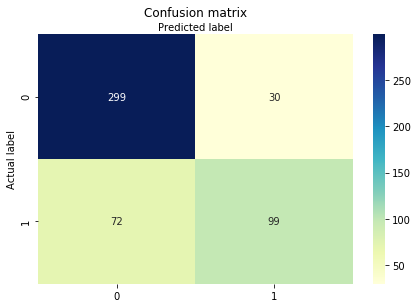

In [17]:
#ploting the confusion matrics
class_names=[0,1] # name of classes
fig , ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True , cmap ="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.796


In [20]:
import pickle
import os

#Saving the model 
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH ="models/logistic_reg.sav"
pickle.dump(logreg, open(MODEL_PATH ,'wb'))

In [21]:
#print(x_test[0])
#y_pred=logreg.predict([[]])
#y_pred

In [22]:
#initialize list of lists
data=[[6,0,33.6,50,148,72,0.627]]

#Create the pandas DataFrame
df = pd.DataFrame(data,columns = ['pregnant', 'glucose', 'bp','insulin','bmi','pedigree','age'])

#predict On new Data
new_pred = logreg.predict(df)
new_pred

array(['1'], dtype=object)